Extracting Dataset from ZIP File

In [ ]:
import zipfile
import os

zip_path = "C:/Users/laksh/Downloads/Dataset.zip"
extract_path = "C:/Users/laksh/Downloads/Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


Verifying Dataset Folder

In [ ]:
import os

dataset_path = "C:/Users/laksh/Downloads/Dataset"

if os.path.exists(dataset_path):
    print("Dataset folder exists.")
    print("Contents of dataset folder:", os.listdir(dataset_path))
else:
    print("Dataset folder not found. Check the path again.")

Dataset folder exists.
Contents of dataset folder: ['images.cv_jzk6llhf18tm3k0kyttxz']


Listing Dataset Files

In [ ]:
import os

dataset_path = "C:/Users/laksh/Downloads/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"

print("Contents of dataset folder:", os.listdir(dataset_path))

Contents of dataset folder: ['test', 'train', 'val']


Data Processing

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Defining dataset directories
dataset_path = "C:/Users/laksh/Downloads/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")
val_dir = os.path.join(dataset_path, "val")

#Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

#Data augmentation and loading
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

val_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

#Testing data (without augmentation)
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

#Printing class labels
print("Class labels:", train_data.class_indices)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Class labels: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


CNN Model for Fish Image Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Defining CNN Model (Fixed Input Shape)
cnn_model = Sequential([
    Input(shape=(224, 224, 3)),  
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),  #Correct flattening before Dense layer

    Dense(512, activation='relu'),  #Increased units for better learning
    Dropout(0.5),
    
    Dense(11, activation='softmax')  #11 output classes
])

#Compiling the Model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

#Displaying Model Summary
cnn_model.summary()

#Callback (Early Stopping + Model Checkpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_cnn_model.keras", save_best_only=True, monitor="val_accuracy")

#Training the Model
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15, 
    callbacks=[early_stopping, model_checkpoint]
)

# ave Model in Keras Format
cnn_model.save("cnn_fish_classification.keras")

print("CNN Model training completed and saved successfully!")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,084,683 (99.51 MB)

 Trainable params: 26,084,683 (99.51 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.2424 - loss: 2.0883 - val_accuracy: 0.5421 - val_loss: 1.3942
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.4954 - loss: 1.4044 - val_accuracy: 0.6648 - val_loss: 1.0125
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.5899 - loss: 1.1461 - val_accuracy: 0.7527 - val_loss: 0.7878
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.6403 - loss: 1.0030 - val_accuracy: 0.7729 - val_loss: 0.7608
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.6805 - loss: 0.8914 - val_accuracy: 0.8168 - val_loss: 0.5976
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.7254 - loss: 0.7632 - val_accuracy: 0.8315 - val_loss: 0.5117
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.7637 - loss: 0.6771 - val_accuracy: 0.8837 - val_loss: 0.4270
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.7983 - loss: 0.6077 - val_accu

Evaluating the CNN Model on Test Data

In [ ]:
#Evaluating the model on test data
test_loss, test_accuracy = cnn_model.evaluate(test_data)
print(f"\n Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 304ms/step - accuracy: 0.9547 - loss: 0.1497

 Test Accuracy: 0.9482
b  Test Loss: 0.1738


Plotting Model Training History

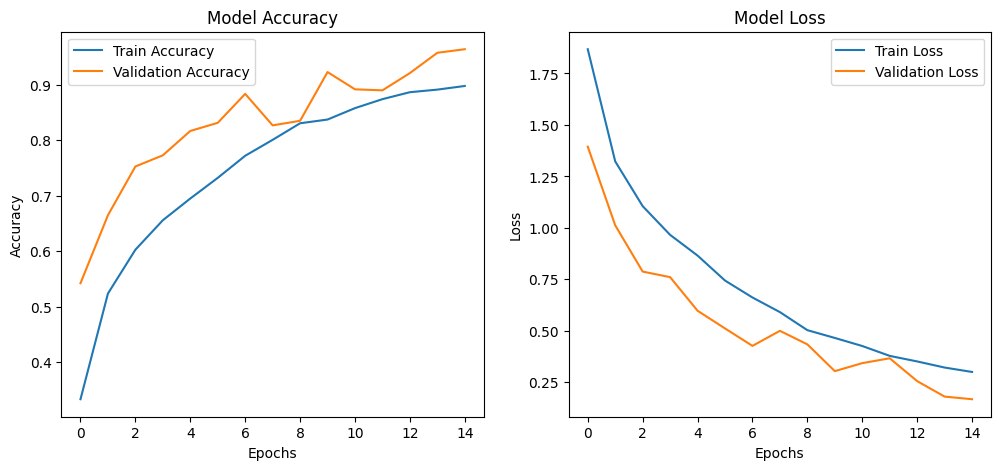

In [ ]:
import matplotlib.pyplot as plt

#Plotting Accuracy & Loss
def plot_training_history(history):
    plt.figure(figsize=(12,5))

    #Accuracy Plotting
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    #Loss Plotting
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

#Calling the function
plot_training_history(history)

Making Predictions on Test Data

In [ ]:
import numpy as np

#Getting class labels
class_labels = list(train_data.class_indices.keys())

#Making predictions
predictions = cnn_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

#Printing some predictions
for i in range(5):
    print(f"True Label: {class_labels[true_classes[i]]} | Predicted: {class_labels[predicted_classes[i]]}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step
🔹 True Label: animal fish | Predicted: fish sea_food trout
🔹 True Label: animal fish | Predicted: animal fish
🔹 True Label: animal fish | Predicted: fish sea_food shrimp
🔹 True Label: animal fish | Predicted: animal fish
🔹 True Label: animal fish | Predicted: fish sea_food striped_red_mullet


Displaying Sample Predictions with Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


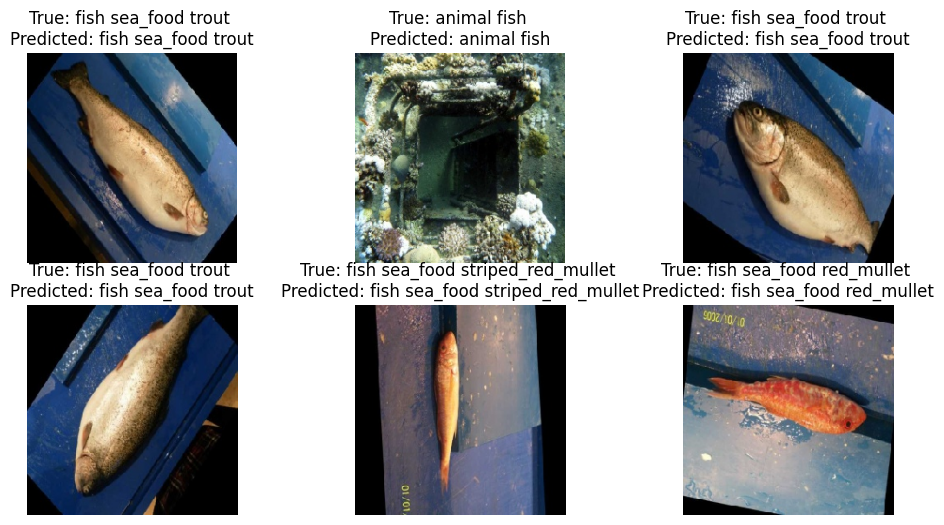

In [ ]:
import matplotlib.pyplot as plt
import random

#Function to Display Sample Predictions
def display_sample_predictions(test_data, model, class_labels):
    images, labels = next(test_data)  # Getting a batch of test images
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 6))

    for i in range(6):
        index = random.randint(0, len(images) - 1)
        plt.subplot(2, 3, i+1)
        plt.imshow(images[index])
        plt.title(f"True: {class_labels[np.argmax(labels[index])]} \nPredicted: {class_labels[predicted_classes[index]]}")
        plt.axis('off')

    plt.show()

#Calling Function to Display Predictions
display_sample_predictions(test_data, cnn_model, class_labels)

Transfer Learning with ResNet50 for Fish Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

#Loading Pre-trained Model (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

#Defining Transfer Learning Model
resnet_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  #11 fish classes
])

#Compiling the Model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

#Model Summary
resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,280,907 (187.99 MB)

 Trainable params: 25,693,195 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Training ResNet50 Model with Callbacks

In [10]:
#Callbacks for early stopping & saving best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_resnet_model.keras", save_best_only=True, monitor="val_accuracy")

#Training Model
history_resnet = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,  #Can reduce epochs to avoid overfitting
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

#Saving Model
resnet_model.save("resnet_fish_classification.keras")
print(" ResNet50 Model training completed and saved successfully!")

Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.1411 - loss: 5.0127 - val_accuracy: 0.1712 - val_loss: 2.3005
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.1746 - loss: 2.3876 - val_accuracy: 0.1712 - val_loss: 2.1917
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.1784 - loss: 2.2861 - val_accuracy: 0.1712 - val_loss: 2.1600
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.1774 - loss: 2.2603 - val_accuracy: 0.1712 - val_loss: 2.1578
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.1796 - loss: 2.2770 - val_accuracy: 0.1712 - val_loss: 2.2889
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.1811 - loss: 2.2829 - val_accuracy: 0.1712 - val_loss: 2.1733
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.1761 - loss: 2.2382 - val_accuracy: 0.1712 - val_loss: 2.1299
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 953s 5s/step - accuracy: 0.1826 - loss: 2.2434 - val_accu

Comparing CNN and ResNet50 Models

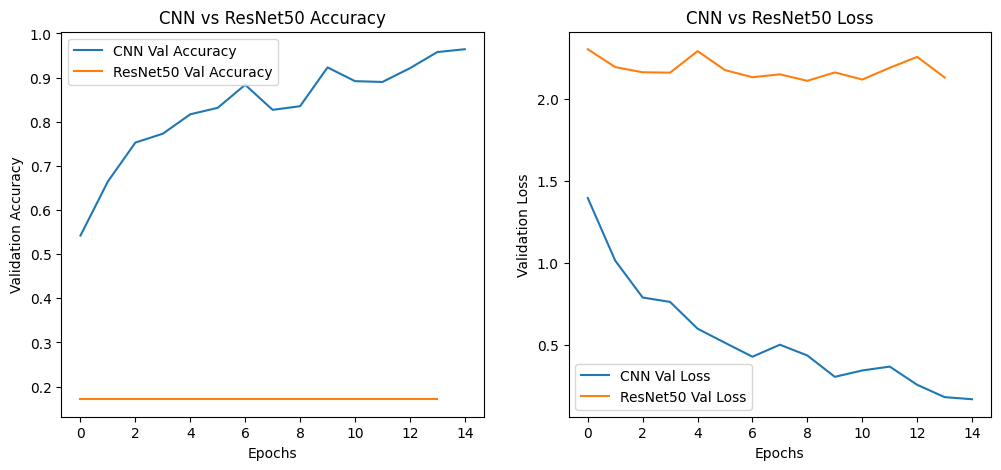

In [11]:
import matplotlib.pyplot as plt

#Function to Compare Models
def compare_models(history_cnn, history_resnet):
    plt.figure(figsize=(12,5))

    #Accuracy Comparison
    plt.subplot(1,2,1)
    plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
    plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('CNN vs ResNet50 Accuracy')

    #Loss Comparison
    plt.subplot(1,2,2)
    plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
    plt.plot(history_resnet.history['val_loss'], label='ResNet50 Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.title('CNN vs ResNet50 Loss')

    plt.show()

#Calling Function
compare_models(history, history_resnet)

Fine-Tuning ResNet50 Model

In [12]:
#Unfreezing Last Few Layers for Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-10]:  #To keep first layer frozen
    layer.trainable = False

#Recompiling Model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

#Retraining the Model
history_resnet_finetuned = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping]
)

#Saving Fine-Tuned Model
resnet_model.save("fine_tuned_resnet.keras")
print("Fine-Tuned ResNet Model saved successfully!")

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1124s 6s/step - accuracy: 0.1681 - loss: 2.3758 - val_accuracy: 0.1712 - val_loss: 2.1685
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 745s 4s/step - accuracy: 0.1755 - loss: 2.2352 - val_accuracy: 0.1712 - val_loss: 2.3277
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 885s 5s/step - accuracy: 0.1789 - loss: 2.1834 - val_accuracy: 0.1712 - val_loss: 2.1987
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 648s 3s/step - accuracy: 0.1762 - loss: 2.1830 - val_accuracy: 0.1712 - val_loss: 2.1646
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.1803 - loss: 2.1617 - val_accuracy: 0.1712 - val_loss: 2.0984
Fine-Tuned ResNet Model saved successfully!


Training ResNet50 Model with Callbacks

In [14]:
#Callbacks for early stopping & saving best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_resnet_model.keras", save_best_only=True, monitor="val_accuracy")

#Training the Model
history_resnet = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=2,  #Can reduce epochs to avoid overfitting
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

#Saving the Trained Model
resnet_model.save("resnet_fish_classification.keras")
print(" ResNet50 Model training completed and saved successfully!")

Epoch 1/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 493s 3s/step - accuracy: 0.1691 - loss: 2.1672 - val_accuracy: 0.1712 - val_loss: 2.1602
Epoch 2/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.1756 - loss: 2.1259 - val_accuracy: 0.1712 - val_loss: 2.0994
 ResNet50 Model training completed and saved successfully!


Evaluating the Best Saved Model

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Loading the Best Saved Model
best_model = tf.keras.models.load_model("best_resnet_model.keras")

#Evaluating Model on Validation Data
val_loss, val_accuracy = best_model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.1714 - loss: 2.1832
Validation Accuracy: 0.1712
Validation Loss: 2.1602


Step: Model Evaluation & Performance Metrics

1. Evaluating the Best Saved Model

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Loading the Best Saved Model
best_model = tf.keras.models.load_model("best_resnet_model.keras")

#Evaluating Model on Validation Data
val_loss, val_accuracy = best_model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.1724 - loss: 2.1361
Validation Accuracy: 0.1712
Validation Loss: 2.1602


2. Extracting True Labels and Predictions

In [ ]:
import numpy as np
import tensorflow as tf

#Loading the Best Model
best_model = tf.keras.models.load_model("best_resnet_model.keras")

#Getting True Labels (Faster)
try:
    y_true = val_data.labels  #Fastest way if using ImageDataGenerator
except AttributeError:
    y_true = np.array([label for _, label in val_data])  

#Getting Predictions (Faster)
y_pred_probs = best_model.predict(val_data, verbose=0)  #Setting verbose=0 to disable logs
y_pred = np.argmax(y_pred_probs, axis=1)

#Getting Class Labels
class_labels = list(val_data.class_indices.keys())

#Printing Shapes to Debug 
print(f"True Labels Shape: {y_true.shape}")
print(f"Predicted Labels Shape: {y_pred.shape}")
print(f"Class Labels: {class_labels}")

True Labels Shape: (1092,)
Predicted Labels Shape: (1092,)
Class Labels: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


3. Generating Classification Report

In [29]:
from sklearn.metrics import classification_report

#Ensuring y_true is 1D (it already is in your case)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=1))

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       1.00      0.00      0.00        10
   fish sea_food black_sea_sprat       1.00      0.00      0.00       105
   fish sea_food gilt_head_bream       1.00      0.00      0.00        94
   fish sea_food hourse_mackerel       1.00      0.00      0.00        97
        fish sea_food red_mullet       1.00      0.00      0.00        90
     fish sea_food red_sea_bream       1.00      0.00      0.00       113
          fish sea_food sea_bass       1.00      0.00      0.00        97
            fish sea_food shrimp       1.00      0.00      0.00       100
fish sea_food striped_red_mullet       1.00      0.00      0.00       101
             fish sea_food trout       1.00      0.00      0.00        98

                        accuracy                           0.17      1092
             

4.Confusion Matrix Visualization

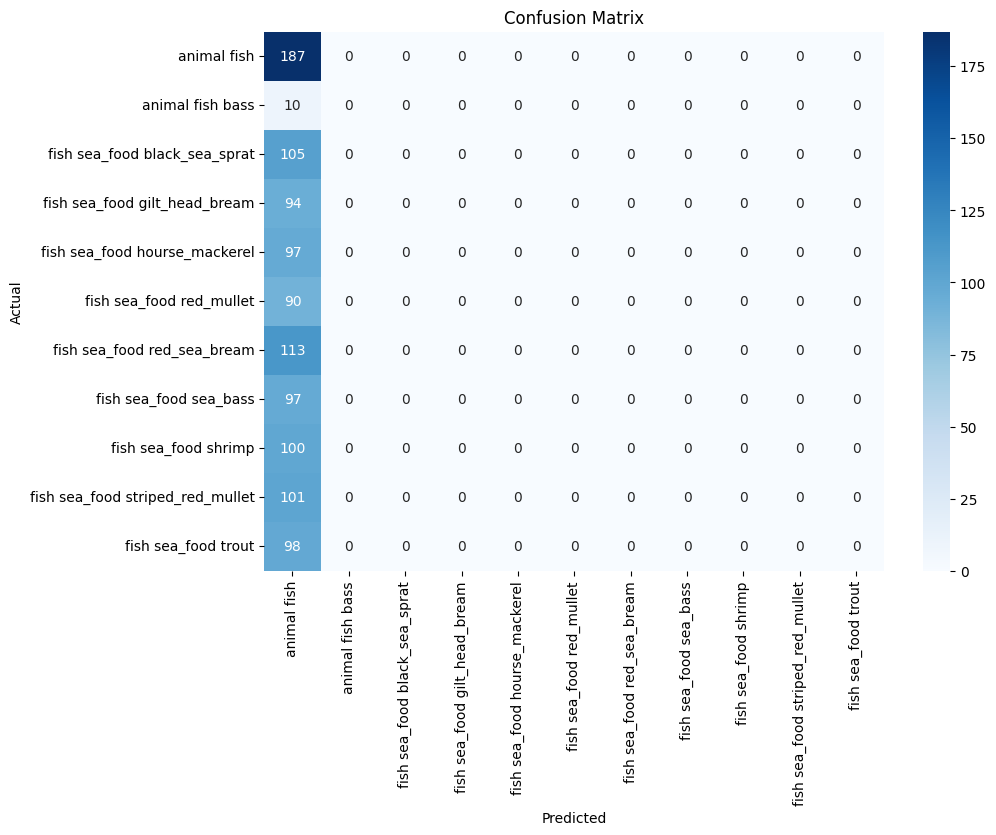

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Computing Confusion Matrix(Fixed)
cm = confusion_matrix(y_true, y_pred)  #No need for `.argmax(axis=1)`

#Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

5. Training History Visualization

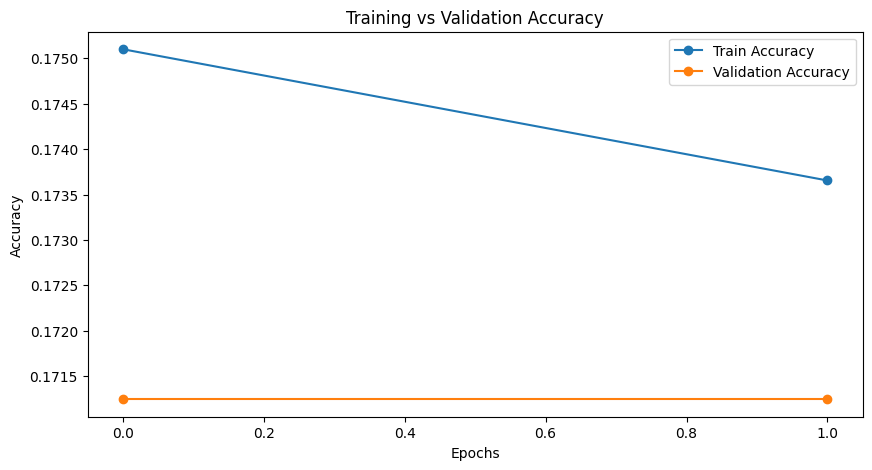

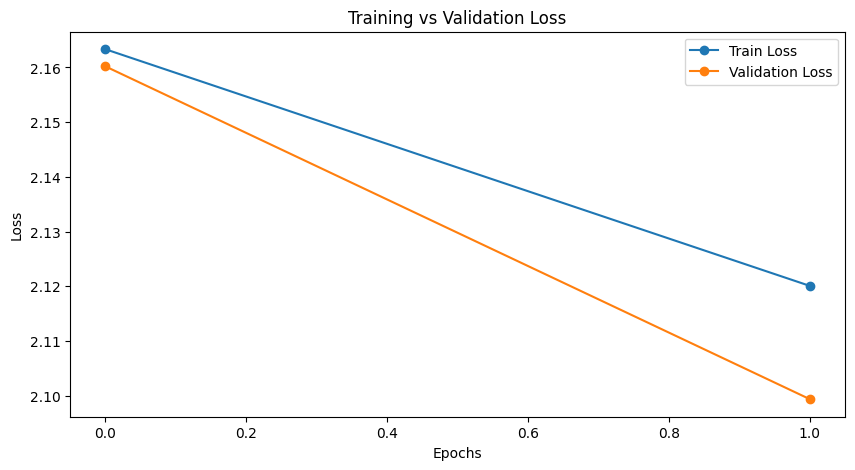

In [ ]:
#Extracting Training History
history = history_resnet.history

#Plotting Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

#Plotting Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Saving Model for Deployment

In [ ]:
import tensorflow as tf

#Loading Best Model
best_model = tf.keras.models.load_model("best_resnet_model.keras")

#Saving as a `.keras` file for Streamlit Deployment
best_model.save("resnet_fish_classification.keras")
print("Model saved successfully for deployment!")

Model saved successfully for deployment!
